# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-53, 54, 55 (Stand: März 2024)

[Raum F1-13](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Franck-Hertz-Versuch

Tin Vrkic E-Mail: uyvpq@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Mika Nock E-Mail: uttzi@student.kit.edu

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: Mo32

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: Michael Waßmer

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: 24.06.2024

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/README.md).**

In [2]:
import pathlib
import pandas as pd
import numpy as np
import kafe2
import scipy as sc
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy as unp

In [3]:
# erstellen einer Funktion für kafe2 Fits
def fit_funktion(xy_data, model_function, xy_error, xy_label, title, constraint=[], add_error=True):
    xy_data = kafe2.XYContainer(xy_data[0], xy_data[1])
    xy_data.label = title
    fit = kafe2.XYFit(xy_data = xy_data, model_function = model_function)
    if add_error:
        fit.add_error(axis = 'x', err_val = xy_error[0])
        fit.add_error(axis = 'y', err_val = xy_error[1])
    for i in range(len(constraint)):
        fit.add_parameter_constraint(name = constraint[i][0], value = constraint[i][1], uncertainty = constraint[i][2])
    fit.do_fit()
    plot = kafe2.Plot(fit)
    plot.x_label, plot.y_label = xy_label[0], xy_label[1]
    
    return fit.parameter_values, fit.parameter_errors, plot

e = 1.602176634 * 10**(-19)

## Aufgabe 1: Messanordnung

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Bauen Sie die Schaltung der Franck-Hertz-$\mathrm{Hg}$-Röhre mit dem zugehörigen Betriebsgerät auf. 
 - Machen Sie sich mit dem Versuchsaufbau vertraut, indem Sie die folgenden Aufgaben bearbieten.

---

### Aufgabe 1.1: Beschreibung der Messanordnung

 * Beschreiben Sie die Messanordnung, die Sie für diesen Versuch vorfinden in eigenen Worten.

---

Die vorgefundene Messanordnung besteht aus drei verschiedenen Teilen. Im Zentrum steht ein Ofen, in dem sich die Franck-Hertz-Röhre befindet. Am Ofen befinden sich ein Thermometer und verschiedene Voltmeter, die an ein Steuergerät angeschlossen sind. Das Steuergerät verfügt über Einstell- und Messmöglichkeiten für jede der Spannungen (Saugspannung, Driftspannung und Gegenfeldspannung) und außerdem über Möglichkeiten, Einfluss auf die zeitabhängige Form von $U_2$ zu nehmen. 


---

### Aufgabe 1.2: Effekt der Steuerparameter an der Röhre

 * Beschreiben Sie in eigenen Worten die Effekte, die einzelne Variationen der Parameter $\vartheta$, $U_{1}$, $U_{2}$ und $U_{3}$ auf $I_{A}$ haben. 
 * Nehmen Sie für $\theta=180,\,160,\,140,\,120^{\circ}\,\mathrm{C}$ jeweils einen Verlauf von $I_{A}$ als Funktion von $U_{2}$, für entsprechend optimierte Werte von $U_{1}$ und $U_{3}$, auf und fügen Sie Ihrem Protokoll eine entsprechende Darstellungen bei. Notieren Sie zu jeder Darstellug die verwendeten Werte von $U_{1}$ und $U_{3}$. 
 * Beschrieben Sie den Kurvenverlauf und die entsprechenden Änderungen qualitativ.

---

Die Spannung $U_1$ liegt zwischen der Glühkathode und dem Gitter $G_1$ an. Durch diese Spannung werden die Elektronen, die aus der Glühkathode ausgelöst werden, abgesaugt und Richtung Driftraum beschleunigt, um Platz für die nächsten Elektronen zu schaffen. Sie reguliert also effektiv den Elektronenstrom durch die Röhre, da sie bestimmt, wie schnell wie viele Elektronen in den Driftraum nachrücken. Je schneller neue Elektronen nachkommen, und damit je höher $U_1$, um so höher kann $I_A$ sein. In Graphen $b)$ in der Abbildung unten geht $I_A$ schon vor Erreichen des Maximalwertes von $U_2$ in die Sättigung, der Graph erreicht also ein Plateau bei höheren Werten von $U_2$. Regelt man dann $U_1$ herunter, senkt man den maximal erreichbaren Elektronenstrom und die Sättigung ist nicht mehr erreichbar. Im Graphen $c)$ hingegen ist die Kurve zu flach, regelt man hier $U_1$ hoch, wird die Kurve auch steiler und die Peaks werden besser sichtbar.  

Mittels der Temperatur $\vartheta$ kann die mittlere freie Weglänge $\lambda$ reguliert werden. Das ist die Wegstrecke, die ein Teilchen in einem Material (in unserem Fall dem Quecksilber-Dampf) im Durchschnitt zurücklegt, bevor es (elastisch oder unelastisch) mit einem anderen Teilchen, vornehmlich Quecksilber Atomen, stößt. Es kann sein, dass die Franck-Hertz-Kurve trotz maximalem $U_1$ zu flach bleibt, z.B. wie im Graphen $c)$. Dann kann man die Temperatur herunterregeln um damit $\lambda$ zu erhöhen, wodurch die Kurve steiler werden sollte.  

Die Spannung $U_2$ liegt zwischen den beiden Gittern $G_1$ und $G_2$ an. Dies ist die eigentliche Beschleunigungsspannung, die die Elektronen im Driftraum nach den Stößen immer wieder beschleunigt. Sie ist in den Franck-Hertz-Kurven auf der x-Achse aufgetragen.  

Die Spannung $U_3$ liegt am anderen Ende der Franck-Hertz-Röhre zwischen dem Gitter $U_3$ und der Anode an. Das ist die Bremsspannung. Nur Elektronen mit einer Energie höher als diese Bremsspannung können bis zur Anode vordringen und zum Elektronenstrom $I_A$ beitragen. Damit reguliert $U_3$ die Ausprägung der Maxima und Minima der Kurven. Liegen sie zu nah beieinander, kann man $U_3$ hochdrehen, um weniger der niederenergetischen Elektronen durchzulassen und damit den Graphen entlang der y-Achse zu "strecken". So kommt man also vom Graphen $d)$ zum Graphen $e)$. Allerdings sollte man darauf achten, parallel auch $U_1$ zu erhöhen. Wird der Unterschied zwischen den Maxima und Minima allerdings zu groß, wie im Graphen $e)$, sodass die Minima bei Nulldurchgang abgehackt werden, sollte man $U_3$ und $U_1$ wieder abwechselnd senken, um die Extrempunkte wieder näher zueinander zu bringen und den optimierten Graphen $f)$ zu erhalten.


!["Optimierung-Franck-Hertz"](figures/OptimierungFranckHertz.png)

Im folgenden wird der Strom $I_A$ als Funktion von $U_2$ für die verschiedenen Temperaturen, Heiz-, Saug- und Gegenfeldspannungen dargestellt. Letztere wurden so eingestellt, damit sich eine schöne Kurve einstellt. Der Strom $I_A$ wurde nicht direkt gemessen, sondern wird über die Spannung $U_A$, die gemessen wurde, berechnet. Dabei entspricht $1\,V$ von $U_A$ einem Strom von $1\,nA$, die Spannung fällt also einem Widerstand der Größenordnung $1\,G\Omega$ ab.

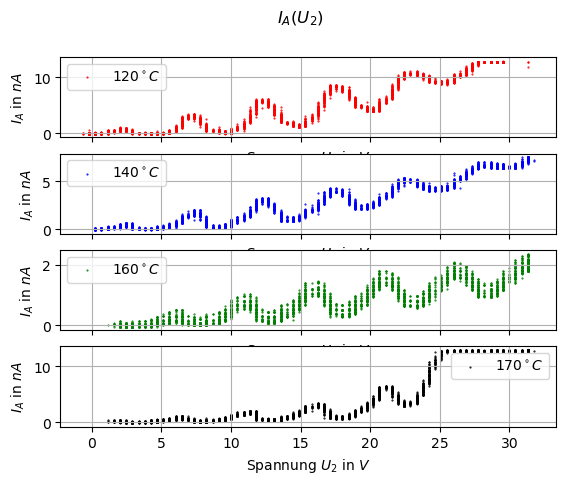

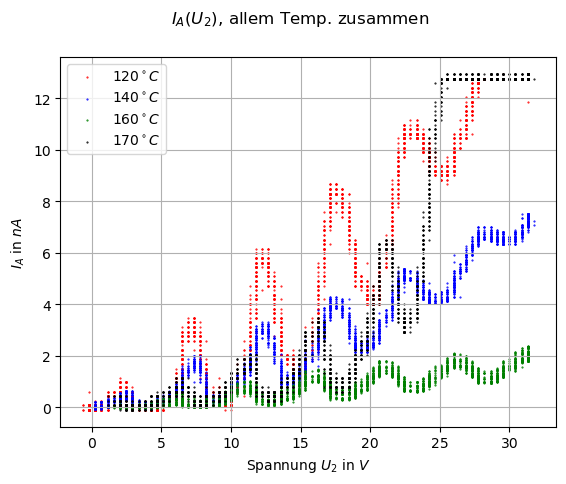

In [4]:
U_H_1 = unp.uarray([4.31 , 4.11 , 4.10 , 5.35] , [0.01]) # Heizspannung in V, 
U_1_1 = unp.uarray([5.32 , 4.09 , 5.32 , 5.32] , [0.01]) # Saugspannung in V,
U_3_1 = unp.uarray([3.07 , 0.98 , 0.00 , 0.57] , [0.01]) # Gegenfeldspannung in V
Temp_1 = np.array([120 , 140 , 160 , 170]) # Temperaturen in °C

# Einlesen der Daten 
df_120C = pd.read_csv("Messungen/Afg1_120C.csv" , delimiter=";", decimal=".")
df_140C = pd.read_csv("Messungen/Afg1_140C.csv" , delimiter=";", decimal=".")
df_160C = pd.read_csv("Messungen/Afg1_160C.csv" , delimiter=";", decimal=".")
df_170C = pd.read_csv("Messungen/Afg1_170C.csv" , delimiter=";", decimal=".")

U_2_120C, I_A_120C = np.array(df_120C["Kanal B"][4:], dtype=np.float32), np.array(df_120C["Kanal A"][4:], dtype=np.float32)*10**(-9)
U_2_140C, I_A_140C = np.array(df_140C["Kanal B"][4:], dtype=np.float32), np.array(df_140C["Kanal A"][4:], dtype=np.float32)*10**(-9)
U_2_160C, I_A_160C = np.array(df_160C["Kanal B"][4:], dtype=np.float32), np.array(df_160C["Kanal A"][4:], dtype=np.float32)*10**(-9)
U_2_170C, I_A_170C = np.array(df_170C["Kanal B"][4:], dtype=np.float32), np.array(df_170C["Kanal A"][4:], dtype=np.float32)*10**(-9)

fig0, ax0 = plt.subplots(4, sharex=True)
ax0[0].scatter(U_2_120C, I_A_120C * 10**(9), s=1, marker=".", c="red", label="$120^\circ C$" )
ax0[0].legend(), ax0[0].grid()
ax0[1].scatter(U_2_140C, I_A_140C * 10**(9), s=1, marker=".", c="blue", label="$140^\circ C$" )
ax0[1].legend(), ax0[1].grid()
ax0[2].scatter(U_2_160C, I_A_160C * 10**(9), s=1, marker=".", c="green", label="$160^\circ C$" )
ax0[2].legend(), ax0[2].grid()
ax0[3].scatter(U_2_170C, I_A_170C * 10**(9), s=1, marker=".", c="black", label="$170^\circ C$" )
ax0[3].legend(), ax0[3].grid()

fig1, ax1 = plt.subplots()
ax1.scatter(U_2_120C, I_A_120C * 10**(9), s=1, marker=".", c="red", label="$120^\circ C$" )
ax1.scatter(U_2_140C, I_A_140C * 10**(9), s=1, marker=".", c="blue", label="$140^\circ C$" )
ax1.scatter(U_2_160C, I_A_160C * 10**(9), s=1, marker=".", c="green", label="$160^\circ C$" )
ax1.scatter(U_2_170C, I_A_170C * 10**(9), s=1, marker=".", c="black", label="$170^\circ C$" )
ax1.legend(), ax1.grid()

fig0.suptitle("$I_A(U_2)$")
fig1.suptitle("$I_A(U_2)$, allem Temp. zusammen")

for ax in ax0:
    ax.set(xlabel="Spannung $U_2$ in $V$", ylabel="$I_A$ in $nA$")
ax1.set_xlabel("Spannung $U_2$ in $V$"), ax1.set_ylabel("$I_A$ in $nA$")
plt.show()

Leider konnte der Ofen nicht ganz bis $180^\circ C$ hochheizen, deshalb ist die höchste Temperatur nur bei $170^\circ C$. In der folgenden Tabelle sind noch die spezifischen Spannungswerte zu jeder Temperatur gezeigt.

|$\mathrm{Temperatur\,} \vartheta$|$\mathrm{Saugspannung\,}U_1$|$\mathrm{Gegenfeldspannung\,}U_3$|$\mathrm{Heizspannung\,}U_H$|
|:--:|:--:|:--:|:--:|
|$120^\circ C$|$5.32\,V$|$3.07\,V$|$4.31\,V$|
|$140^\circ C$|$4.09\,V$|$0.98\,V$|$4.11\,V$|
|$160^\circ C$|$5.32\,V$|$0.00\,V$|$4.10\,V$|
|$170^\circ C$|$5.32\,V$|$0.57\,V$|$5.35\,V$|

Der Vergleich der Kurvenverläufe lässt sich in dem Plot, in dem alle Franck-Hertz-Kurven gemeinsam dargestellt sind, am besten vornehmen.  
Zunächst zum Einfluss der Temperaturen: In Afg. 1.1 wurde beschrieben, dass eine Senkung der Temperatur eine Erhöhung der mittleren freien Weglänge und damit eine steilere Franck-Hertz-Kurve zur Folge hat und umgekehrt. In oben genanntem Plot sieht man, dass die Kurve in rot ($\vartheta=120^\circ C$) steiler ist als die in blau ($\vartheta=140^\circ C$) und in grün ($\vartheta=160^\circ C$). Die Steigung nimmt mit steigender Temperatur also merklich ab. Einzige Ausnahme ist die scharze Kurve ($\vartheta=170^\circ C$), die aber sowieso schwer zum optimieren war. Man sieht nämlich, dass sie schon bei etwa $U_2=25\,V$ in die Sättigung geht (dazu hätte man $U_1$ senken müssen), aber besser war diese Kurve nicht zu optimieren, da sonst die Peaks zu schlecht sichtbar gewesen wären.  
Den Effekt der Gegenspannung $U_3$ kann man auch gut erkennen: Als einzige Kurve hat die rote ($\vartheta=120^\circ C$) eine Gegenspannung $>1\,V$ (s. Tabelle). Dementsprechend groß sind auch die Höhendifferenzen der Minima und Maxima, im Gegensatz zu den restlichen Kurve, bei denen die Peaks zwar trotzdem relativ gut zu unterscheiden sind, aber die Höhendifferenzen lange nicht so groß sind wie bei der roten Kurve. Das hat, wie in Afg. 1.1 beschrieben, direkt mit der Gegenspannung $U_3$ zu tun.  
Viel mehr lässt sich nur schwer vergleichen, da z.B. die Saugspannung $U_1$ zwischen den versch. Temperaturen fast gleich bleibt. Lediglich für $\vartheta=140^\circ C$ (Kurve in blau) ist die Saugspannung etwas niedriger, ein richtiger Unterschied lässt sich dadurch aber nicht feststellen. 


---

## Aufgabe 2: Charakterisierung der $\mathrm{Hg}$-Röhre

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

Charakterisieren Sie die Röhre, für die Einstellungen von $\vartheta$, $U_{1}$ und $U_{3}$ aus **Aufgabe 1.2**, die Ihnen dafür am besten geeignet erscheinen. Bearbeiten Sie hierzu die folgenden Aufgaben.

---

### Aufgabe 2.1: Bestimmung der Spannungsdifferenz $\Delta U_{B}$ und der effektiven Kontaktspannung $U_{\mathrm{th.}}$

 * Bestimmen Sie die Spannungsdifferenz $\Delta U_{B}$ mit Hilfe der beobachteten Maxima und/oder Minima des Verlaufs von $I_{A}$.
 * Bestimmen Sie die effektive Kontaktspannung $U_{\mathrm{th.}}$.
 * Kalibrieren Sie für Ihre spätere Auswertung die $x$-Achse **aller aufgezeichneten Diagramme** entsprechend, so dass dort $U_{B}$ angezeigt wird.

---

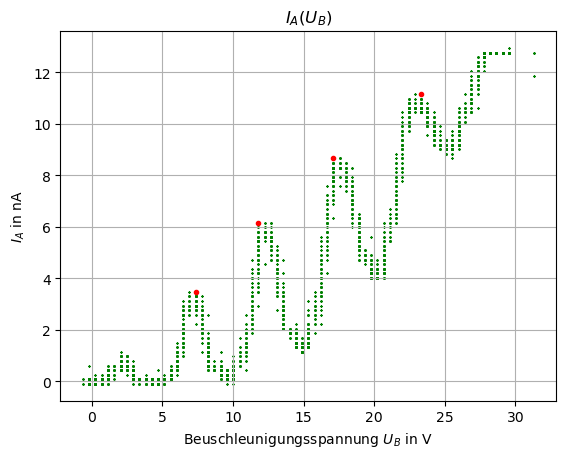

In [5]:
# Definition der benötigten Konstanten
U_1 = 5.32

# Einlesen und formatieren der Daten
data_21 = pd.read_csv('Messungen/Afg1_120C.csv', delimiter=';', decimal='.')

U_2 = np.array(data_21['Kanal B'][3:], dtype = np.float32)
I_A = np.array(data_21['Kanal A'][3:], dtype = np.float32)

# Plotten des Graphen
plt.grid()
plt.scatter(U_2, I_A, s=1, marker='x', c='green')
plt.title('$I_A(U_B)$')
plt.xlabel('Beuschleunigungsspannung $U_B$ in V')
plt.ylabel('$I_A$ in nA')

# finden der Peaks
peaks = sc.signal.find_peaks(I_A, distance=350)[0][2:6]
peaks_U_2 = np.array([U_2[int(i)] for i in peaks])
peaks_I = np.array([I_A[int(i)] for i in peaks])

# plotten der peaks
plt.plot(peaks_U_2, peaks_I,'r.')
plt.show()

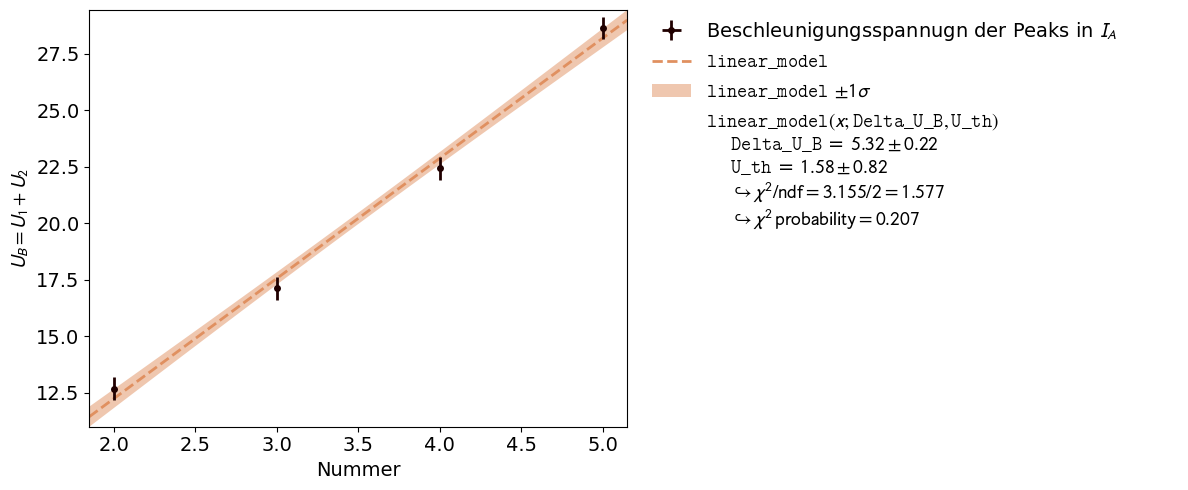

In [6]:
# defining a model
def linear_model(x, Delta_U_B, U_th):
    return Delta_U_B * x + U_th

# fitting data
fit_data = kafe2.XYContainer([2,3,4,5],peaks_U_2 + U_1)
fit_data.label = 'Beschleunigungsspannugn der Peaks in $I_A$'
fit_data.axis_labels = ('Nummer','$U_B = U_1 + U_2$')

fit = kafe2.XYFit(fit_data, linear_model)
fit.add_error('y', 0.5)
fit.do_fit()

# plotting the fit
plot = kafe2.Plot(fit)
plot.plot()
plot.show()

# defining the constants of the fit 
U_th = ufloat(fit.parameter_values[0],fit.parameter_errors[0])
deltaU_B = ufloat(fit.parameter_values[1],fit.parameter_errors[1])

In dieser Aufgabe wird mithilfe der gemessenen Daten aus Aufgabe 1 die effektive Kontaktspannung $U_{th}$ an den Kontakten und die Spannungsdifferenz $\Delta U_B$ zwischen zwei Peaks des Auffängerstroms $I_A$ bestimmt.

Es wird zuerst einer der Datensätze aus Aufgabe 1 ausgewählt. In diesem Fall werden die Werte für $\vartheta = 120°C$, $U_1 = 5.32V$, $U_3 = 3.07V$ und $U_H = 4.31V$ verwendet, da sich für diese Einstellungen der Parameter der deutlichste Verlauf für $I_A$ ergibt und keine Frühzeitige Sättigung stattfindet.

Aus diesem Verlauf werden die Indizes der Peaks von $I_A$ genommen und jeweils deren Spannung und somit auch die Beschleunigungsspannung $U_B = U_1 + U_2$ bestimmt. Diese können nun gegenüber der Nummer des Peaks aufgetragen werden. Über den Fit einer gerade erhält man nun mithilfe der Steigung $\Delta U_B$ und mithilfe des y-Achsen-Abschnitts $U_{th}$. Hierbei wird der erste Peak ausgelassen, da sich mit den bekannten Methoden kein zuverlässiges Ergebnis für seine Position erhalten lässt. 

Der durchgeführte Fit liegt mit $\chi^2 = 1.577$ in einem akzeptablen Bereich. Die Unsicherheit auf die Spannung $U_B$ folgt aus der breite der Peaks im Graphen des Anodenstroms und wurde hier auf $1V$ gesetzt. Wir erhalten somit die Werte:
$$\Delta U_B = 5.32V \pm 0.22 V$$
$$U_{th} = 1.58V \pm 0.82V$$


---

### Aufgabe 2.2: Verlauf des Anodenstroms $I_{\mathrm{G2}}$

 * Bestimmen Sie den Anodenstrom $I_{G2}$ als Funktion von $U_{2}$. 
 * Überprüfen Sie durch geeignete Auftragung die aus dem [Raumladungsgesetz](https://de.wikipedia.org/wiki/Raumladungsgesetz) erwartete Abhängigkeit von $U_{2}$.

---

/home/mika/Programme/anaconda3/lib/python3.11/site-packages/numdifftools/extrapolation.py:556: RuntimeWarning: overflow encountered in multiply
  err = np.abs(np.diff(new_sequence, axis=0)) * fact
/home/mika/Programme/anaconda3/lib/python3.11/site-packages/numdifftools/extrapolation.py:560: RuntimeWarning: overflow encountered in multiply
  abs(new_sequence[:-1] -
/home/mika/Programme/anaconda3/lib/python3.11/site-packages/numdifftools/extrapolation.py:559: RuntimeWarning: overflow encountered in add
  abserr = err + np.where(converged, tol * 10,
/home/mika/Programme/anaconda3/lib/python3.11/site-packages/scipy/_lib/_finite_differences.py:145: RuntimeWarning: invalid value encountered in divide
  return val / prod((dx,) * n, axis=0)


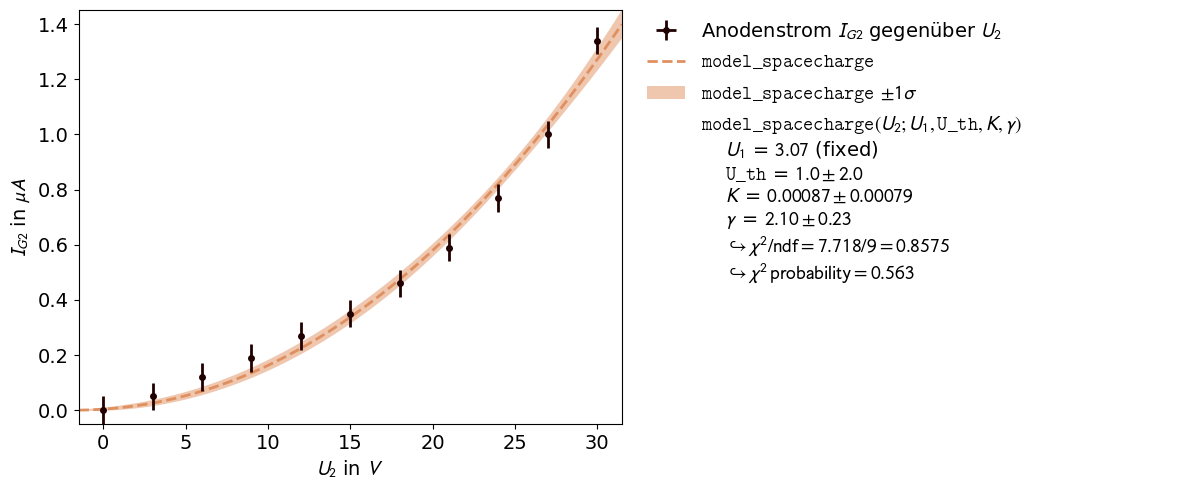

In [95]:
# Messen der Daten
U_1 = ufloat(3.07,0.01)
U_2 = np.array([0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0]) # V
I_g2 = np.array([0, 0.05, 0.12, 0.19, 0.27, 0.35, 0.46, 0.59, 0.77, 1.00, 1.34])  #muA, 0.1 std

def model_spacecharge(U_2,U_1,U_th,K=0.001,gamma=1.5):
    return K * (U_1 + U_2 - U_th) ** gamma

# fitting data
fit_data = kafe2.XYContainer(U_2,I_g2)
fit_data.label = 'Anodenstrom $I_{G2}$ gegenüber $U_2$'
fit_data.axis_labels = ('$U_2$ in $V$','$I_{G2}$ in $\mu A$')

# making fit 2
fit = kafe2.XYFit(fit_data, model_spacecharge,minimizer='scipy')
fit.add_parameter_constraint('U_th',0.76,2.4)
fit.limit_parameter('gamma',1,5)
fit.fix_parameter('U_1',3.07)
fit.add_error('y',0.05)
fit.do_fit()

# plotting the fit
plot = kafe2.Plot([fit])
plot.plot()
plot.show()

In diesem Versuchtseil wird bestimmt, ob das  Schottky-Langmurische Raumladungsgesetz, welches eigentlich nur für evakuierte Röhren gilt, auch in diesem Fall angewendet werden kann. Hierfür wurde $U_1 = 3.07V \pm 0.01V$ und $U_3 = 0V$ eingestellt und der Anodenstrom gemessen.

Der Anodenstrom $I_{G2}$ wird nun gegenüber der Spannung $U_2$ aufgetragen und das Modell $I_{G2} = \kappa \cdot (U_1 + U_2 - U_{th})^\gamma$ eingepasst. Es kann nun überprüft werden, ob nach dem Schottky-Langmurischen Raumladungsgsesetz $\gamma = \frac{3}{2}$ erfüllt ist. 

Der Fit selbst reagiert stark auf verschiedene Befehle zur Beschränkung der Parameter. Limitierungen werden teilweise nicht eingehalten und die Fits konvergieren selten. Um das bestmögliche Ergebnis zu erhalten wurde der statt des Standardminimizers "iminuit" der Minimizer von Scipy gewählt und der Parameter $U_1$ trotz einer darauf liegenden Unsicherheit fixiert. Außerdem wurde der Bereich indem $U_{th}$ liegt auf den in $2.1$ erhaltenen Wert mit jeweils der Unischerheit addiert bzw. subtrahiert limitiert. 

Insgesamt erhalten wir somit eine Anpassung mit $\chi^2 = 0.858$ was im Akzeptanzbereich liegt. Da gilt $\gamma = 2.10 \pm 0.23$ kann angenommen werden, dass das Schottky-Langmurische Raumladungsgesetz zumindest näherungsweise gilt. 

---

## Aufgabe 3: Höhere Anregungen von $\mathrm{Hg}$

**Hinweise zu Aufgabe 3 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

Untersuchen Sie höhere Anregungen von $\mathrm{Hg}$ und schätzen Sie seine Ionisierungsenergie ab. Bearbeiten Sie hierzu die folgenden Aufgaben.

---

### Aufgabe 3.1: Beobachtung höherer Anregungen von $\mathrm{Hg}$

 * Bestimmen Sie den Verlauf von $I_{A}$ als Funktion von $U_{B}$ unter Betriebsbedingungen, die für die Erzeugung höherer Anregungszustände in $\mathrm{Hg}$ geeignet sind. 
 * Versuchen Sie im Rahmen Ihrer Auswertung soviele Strukturen im Verlauf von $I_{A}$ wie möglich zu identifizieren. Dieser wird im Wesentlichen durch Linearkombinationen der beiden niedrigsten Anregungsenergien bestimmt.

---

Energien der Peaks:
1. Peak: 6.7V
2. Peak: 9.7V
3. Peak: 23.1V
4. Peak: 25.0V
5. Peak: 29.8V


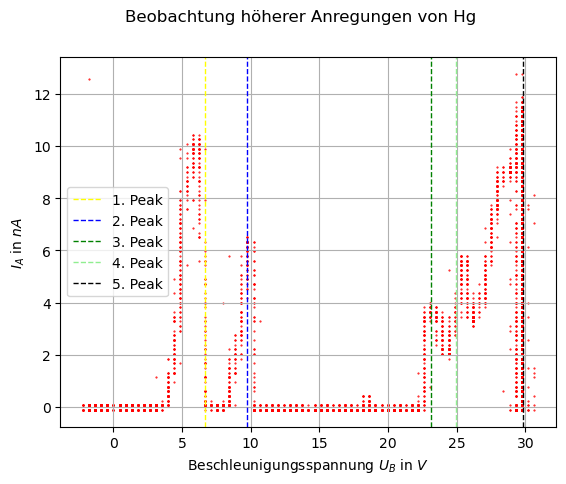

In [8]:
U_H = 4.53
U_3 = 2.47
df_Afg3 = pd.read_csv("Messungen/Afg3.csv" , delimiter=";", decimal=".")
U_2_3, I_A_3 = np.array(df_Afg3["Kanal B"][4:], dtype=np.float32) , np.array(df_Afg3["Kanal A"][4:], dtype=np.float32)*10**(-9)

a = 4.86 # V
b = 6.7 # V
U_th = 1.58

fig1, ax1 = plt.subplots()
ax1.scatter(U_2_3 - U_th, I_A_3 * 10**(9), s=1, marker=".", c="red" )
# 1. Peak
ax1.axvline(x= b , color="yellow", linewidth=1., linestyle="--", label="1. Peak")
# 2. Peak
ax1.axvline(x= 2 * a , color="blue", linewidth=1., linestyle="--", label="2. Peak")
# 3. Peak
ax1.axvline(x= 2 * b + 2 * a , color="green", linewidth=1., linestyle="--", label="3. Peak")
# 4. Peak
ax1.axvline(x= 3 * b + 1 * a , color="lightgreen", linewidth=1., linestyle="--", label="4. Peak")
# 5. Peak
ax1.axvline(x= 3 * b + 2 * a , color="black", linewidth=1., linestyle="--", label="5. Peak")

ax1.grid(), ax1.legend()

fig1.suptitle("Beobachtung höherer Anregungen von Hg")
ax1.set(xlabel="Beschleunigungsspannung $U_B$ in $V$", ylabel="$I_A$ in $nA$")

print("Energien der Peaks:")
print(f"1. Peak: {b:.1f}V")
print(f"2. Peak: {2 * a:.1f}V")
print(f"3. Peak: {2 * b + 2 * a:.1f}V")
print(f"4. Peak: {3 * b + 1 * a:.1f}V")
print(f"5. Peak: {3 * b + 2 * a:.1f}V")

Leider haben wir während des Versuchs nicht hinterfragt, dass diese Franck-Hertz-Kurve nicht optimal für die Auswertung ist. Eigentlich sollte man zwei oder drei Doppelpeaks sehen, also zwei Peaks schnell hintereinander, wobei der zweite höher sein sollte als der erste. Nach Rücksprache mit anderen Gruppen, die diesen Versuch schon absolviert haben, ergab sich diese Erwartung ebenfalls. Leider haben wir zunächst etwas, was aussieht wie ein Doppelpeak, wobei die Peaks aber komplett getrennt sind und der erste höher ist als der zweite. Die zweite erkennbare Struktur besteht aus drei Peaks so, wie man sie erwarten würde. Ein Peak höher als der vorherige und alle Peaks sind miteinander verbunden. Allerdings sind das ein Peak zu viel in der Struktur. Wir müssen irgendetwas falsch oder suboptimal eingestellt haben, wissen aber nicht genau, was. Mit unserer Apparatur war es aber ohnehin schon schwer, die Kurve überhaupt so einzustellen, wie man sie im Plot sieht.  
Die Positionen einiger Peaks passen nicht ganz perfekt mit ganzzahligen Linearkombinationen der niedrigsten Energieüberträgen optisch erlaubter Übergänge zusammen, andere dafür umso besser, daher wurden alle mit der am besten passenden Linearkombination markiert. Die einzigen Energieüberträge die daher in Frage kommen sind $a=4.86\,eV$ und $b=6.7\,eV$. Die Thermospannung wurde in Afg. 2 bestimmt zu $U_{th} = 1.58V \pm 0.82V$  

1. Peak: $6.7\,V = 6.7\,V$  
2. Peak: $2 \cdot 4.86\,V = 9.7\,V$  
3. Peak: $2 \cdot 6.7\,V + 2 \cdot 4.86\,V = 23.1\,V$  
4. Peak: $3 \cdot 6.7\,V + 1 \cdot 4.86\,V = 25.0\,V$  
5. Peak: $3 \cdot 6.7\,V + 2 \cdot 4.86\,V = 29.8\,V$  


### Aufgabe 3.2: Ionisierungsenergie von $\mathrm{Hg}$

 * Bestimmen Sie aus dem Verlauf von $I_{G_{2}}$ als Funktion von $U_{B}$ die Ionisierungsenergie von $\mathrm{Hg}$.
 * Beobachten Sie mit dem Taschenspektroskop die im Bereich des sichtbaren Lichts liegenden Emissionslinien bei brennender Gasentladung. Lassen Sie hierzu eine ständige Gasentladung zünden. Fügen Sie Ihrem Protokoll ein entsprechendes Bild zu.
 
---

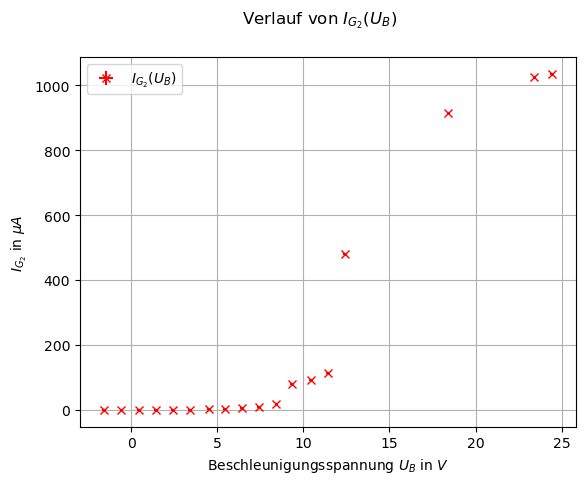

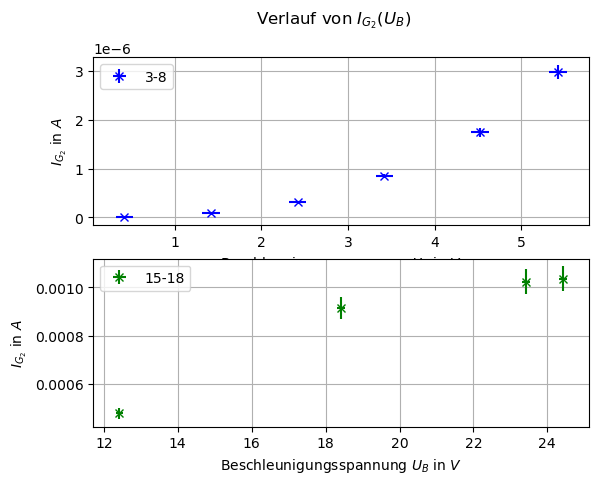

In [9]:
U_2 = unp.uarray([0. , 1. , 2. , 3. , 4. , 5. , 6.1 , 7. , 8. , 9. , 10. , 10.9 , 12. , 13. , 14. , 20. , 25. , 26. ],[0.1])
I_g2 = unp.uarray([0. , 0. , 0. , 0.1 , 0.31 , 0.84 , 1.74 , 2.97 , 5.16 , 10.35 , 18.32 , 81.22 , 93.22 , 112.6 , 479.2 , 914.7 , 1024.5,1035.4], np.array([0. , 0. , 0. , 0.1 , 0.31 , 0.84 , 1.74 , 2.97 , 5.16 , 10.35 , 18.32 , 81.22 , 93.22 , 112.6 , 479.2 , 914.7 , 1024.5 , 1035.4]) * .05 ) * 10**(-6)

fig2, ax2 = plt.subplots()
ax2.errorbar(unp.nominal_values(U_2-U_th), unp.nominal_values(I_g2)*10**(6), xerr=unp.std_devs(U_2), yerr=unp.std_devs(I_g2), fmt="rx", label="$I_{G_2}(U_B)$")
ax2.legend(), ax2.grid()
fig2.suptitle("Verlauf von $I_{G_2}(U_B)$")
ax2.set(xlabel="Beschleunigungsspannung $U_B$ in $V$", ylabel="$I_{G_2}$ in $\mu A$")
plt.show()

fig3, ax3 = plt.subplots(2)
ax3[0].errorbar(unp.nominal_values(U_2[2:8]-U_th), unp.nominal_values(I_g2[2:8]), xerr=unp.std_devs(U_2[2:8]), yerr=unp.std_devs(I_g2[2:8]), fmt="bx", label="3-8")
ax3[1].errorbar(unp.nominal_values(U_2[14:18]-U_th), unp.nominal_values(I_g2[14:18]), xerr=unp.std_devs(U_2[14:18]), yerr=unp.std_devs(I_g2[14:18]), fmt="gx", label="15-18")
ax3[0].legend(), ax3[0].grid()
ax3[1].legend(), ax3[1].grid()
fig3.suptitle("Verlauf von $I_{G_2}(U_B)$")
for ax in ax3:
    ax.set(xlabel="Beschleunigungsspannung $U_B$ in $V$", ylabel="$I_{G_2}$ in $A$")

Hier wurde von der gemessenen Spannung $U_2$ die Thermospannung $U_{Th}$ abgezogen. Die Messwerte selbst sind dann bis etwa $8\,\rm{V}$ schön glatt, machen dann einen Sprung und weisen danach ein Wurzelhaftes Verhalten auf. Eigentlich sollten der Verlauf aber zunächst linear verlaufen, dann im  Bereich der Ionisationsenergie stärker ansteigen und dann wieder einigermaßen linear verlaufen, sodass man jeweils eine Gerade durch die ersten und letzten paar Messwerte legen kann, um aus dem Schnittpunkt dann die Ionisationsenergie zu bekommen. Da die ersten 3 Messpunkte aber bei $I_{G_2}=0\,\rm{A}$ liegen, lässt sich sehr schlecht eine Gerade durch diese Werte legen. Daher nutzen wir die Messpunkte $\rm{3}$ bis einschl. $\rm{5}$ für die erste, und die Messpunkte $\rm{15}$ bis einschl. $\rm{18}$ für die zweite Gerade. Das Modell ist linear: $I_{G_2}(U_B)=m\cdot U_B +c$. Die Messwerte sind also alles andere als ideal, was sich auch im folgenden Fit wiederspiegelt. Irgendetwas muss bei der Messung wohl schiefgelaufen sein, vielleicht lag es aber auch an der Apparatur.

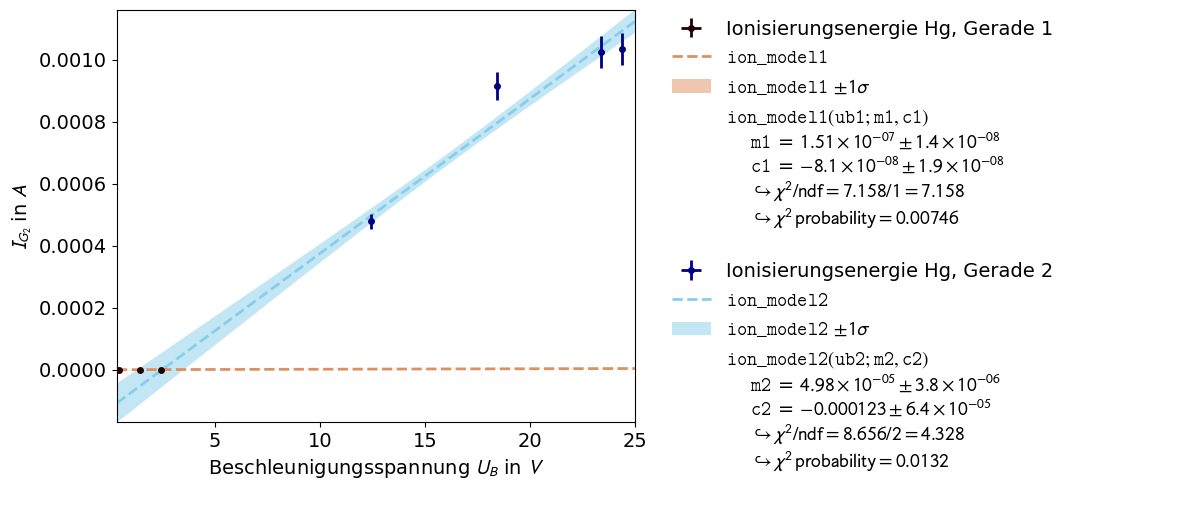

Kovarianzmatrizen:
Gerade 1:
[[ 1.93824960e-16 -2.30087820e-16]
 [-2.30087820e-16  3.68917237e-16]] 

Gerade 2:
[[ 1.40746224e-11 -2.30308134e-10]
 [-2.30308134e-10  4.11471551e-09]] 

Schnittpunkt aus Fit: 2.48+/-1.30


In [10]:
def ion_model1(ub1, m1, c1):
    return m1 * ub1 + c1
def ion_model2(ub2, m2, c2):
    return m2 * ub2 + c2
ion_data1 = kafe2.XYContainer( unp.nominal_values(U_2[2:5]-U_th) , unp.nominal_values(I_g2[2:5]) )
ion_data2 = kafe2.XYContainer( unp.nominal_values(U_2[14:18]-U_th) , unp.nominal_values(I_g2[14:18]) )
ion_data1.label = "Ionisierungsenergie Hg, Gerade 1" # Title
ion_data2.label = "Ionisierungsenergie Hg, Gerade 2" # Title

fit1 = kafe2.XYFit(xy_data = ion_data1, model_function = ion_model1)
fit2 = kafe2.XYFit(xy_data = ion_data2, model_function = ion_model2)

fit1.add_error(axis="x" , err_val=unp.std_devs(U_2[2:5]-U_th))
fit1.add_error(axis="y" , err_val=unp.std_devs(I_g2[2:5]))
fit2.add_error(axis="x" , err_val=unp.std_devs(U_2[14:18]-U_th))
fit2.add_error(axis="y" , err_val=unp.std_devs(I_g2[14:18]))

fit1.do_fit()
fit2.do_fit()

plot1 = kafe2.Plot([fit1, fit2])
plot1.x_label , plot1.y_label = "Beschleunigungsspannung $U_B$ in $V$", "$I_{G_2}$ in $A$"
plot1.plot()
plot1.show()
print("Kovarianzmatrizen:")
print("Gerade 1:")
print(fit1.get_result_dict()["parameter_cov_mat"], "\n")
print("Gerade 2:")
print(fit2.get_result_dict()["parameter_cov_mat"], "\n")


fit1.get_result_dict()

m1_fit, c1_fit = ufloat(fit1.parameter_values[0], fit1.parameter_errors[0]), ufloat(fit1.parameter_values[1], fit1.parameter_errors[1])
m2_fit, c2_fit = ufloat(fit2.parameter_values[0], fit2.parameter_errors[0]), ufloat(fit2.parameter_values[1], fit2.parameter_errors[1])

stpkt_fit = (c2_fit-c1_fit)/(m1_fit-m2_fit)
print(f"Schnittpunkt aus Fit: {stpkt_fit:.2f}")


Aufgrund der suboptimalen Messung fallen die Fits, wie schon erwähnt, nicht sehr gut aus. Die Ergebnisse der Fits sind wie folgt mit ziemlich schlechten $\chi^2\rm{\ probabilities}$:  
Gerade 1:  
- $m_1=(1.51\pm0.14)\cdot 10^{-7}\,\rm{\frac{A}{V}}$  
- $c_1=(-8.1\pm1.9)\cdot 10^{-8}\,\rm{A}$  
- $\chi^2\rm{\ probability}=0.00746$  

Gerade 2:  
- $m_1=(4.98\pm0.38)\cdot 10^{-5}\,\rm{\frac{A}{V}}$  
- $c_1=(-1.23\pm0.64)\cdot 10^{-4}\,\rm{A}$  
- $\chi^2\rm{\ probability}=0.0132$  

Aus diesen Steigungen und y-Achsenabschnitten lässt sich der Schnittpunkt der Geraden bestimmen zu $U_B=(2.48\pm1.30)\,\rm{V}$, wobei der Literaturwert der Ionisationsenergeie laut Vorbereitung bei $10.44\,\rm{eV}$ liegt, also um einiges höher. Unser Ergebnis gibt aber zumindest einmal eine untere Grenze, wobei man natürlich über die Aussagekraft diskutieren kann, da die Fits ziemlich schlecht ausfallen.  

Man kann sich jetzt noch die Kovarianzmatrizen zu beiden Fits anschauen. Wenn sich die Nicht-Diagonalelemente stark von $0$ unterscheiden, dann sind die gefitteten Parameter stark korreliert oder antikorreliert und eine die einfache Fehlerfortpflanzung funktioniert nicht mehr. Wir machen dann eine Monte-Carlo Simulation für einige tausend Wiederholungen, um eine bessere Unsicherheit zu erhalten. Die Kovarianzmatrizen lauten für  

Die Kovarianzmatrizen lauten für
- Gerade 1: $\begin{pmatrix} 1.94&-2.30 \\ -2.30&3.69 \end{pmatrix}\cdot 10^{-16}$   
- Gerade 2: $\begin{pmatrix} 0.14&-2.30 \\ -2.30&41.15 \end{pmatrix}\cdot 10^{-10}$  

Da alle Einträge, also vor allem auch die Nicht-Diagonalelemente, bei Größenordungen von $10^{-16}$ bzw. $10^{-9}$ bis $10^{-11}$ liegen, also relativ nah an der $0$, wäre hier eigentlich keine Monte-Carlo Simulation nötig. Wir machen aber trotzdem eine.

In [11]:
m1c1, cov_mat1 = np.array([fit1.parameter_values[0], fit1.parameter_values[1]]), fit1.get_result_dict()["parameter_cov_mat"]
m2c2, cov_mat2 = np.array([fit2.parameter_values[0], fit2.parameter_values[1]]), fit2.get_result_dict()["parameter_cov_mat"]

wdh = 10000
rng = np.random.default_rng()
mc_1 = rng.multivariate_normal(m1c1, cov_mat1, wdh)
mc_2 = rng.multivariate_normal(m2c2, cov_mat2, wdh)
stpkt = ( mc_2[:,1] - mc_1[:,1] ) / ( mc_1[:,0] - mc_2[:,0] )
stpkt_mean = np.mean(stpkt)
stpkt_std = np.std(stpkt)
print(f"Schnittpunkt aus Monte-Carlo: {stpkt_mean:.2f} +/- {stpkt_std:.2f}")

Schnittpunkt aus Monte-Carlo: 2.40 +/- 1.14


Der Schnittpunkt, der sich aus der Monte-Carlo Simulation ergibt, sollte eigentlich ziemlich dem entsprechen, den wir aus dem Fit erhalten. Mit $U_B=(2.42\pm1.13)\,\rm{V}$ sind sie nicht genau die gleichen Werte, aber es scheint doch nah genug. Was auffällt, ist, dass sich die Unsicherheit nicht so sehr von der Unsicherheit aus dem Fit unterscheidet, sie ist nur ein wenig kleiner. Das kann aber gut daher kommen, dass die Fehlerfortpflanzung im Fit tatsächlich ausreicht, da die Nicht-Diagonalelemente der Kovarianzmatrizen so niedrig sind und sich damit nur schwach von der $0$ unterscheiden. 

## Aufgabe 4: Bestimmung der mittleren Energie für die Anregung von $\mathrm{Ne}$ durch Elektronenstoß

**Hinweise zu Aufgabe 4 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

Bestimmen Sie die mittlere Energie für die vorherrschenden Anregungen von $\mathrm{Ne}$ durch Elektronenstoß. Gehen Sie dabei analog zu **Aufgabe 2.1** vor. 

---

![Franck-Hertz_Neon](Messungen/Franck-Hertz-Kurve_Neon.jpeg)

In [12]:
#m Definition der Thermospannung
U_th = ufloat(2.5,0.5)

# ausmessen der Peaks
p1 = ufloat(15,0.5)
p2 = ufloat(31,0.5)

# Ausrechnen der Anregungsenergie
DU_B = p2 - p1 
E = DU_B + U_th

# Ausgeben der Werte
print(f'Die Spannugnsdifferenz zwischen zwei Peaks beträgt {DU_B.n}V +/- {round(DU_B.s,2)}V')
print(f'Die mittlere Anregungsenergie beträgt {DU_B.n}eV +/- {round(DU_B.s)}eV')

Die Spannugnsdifferenz zwischen zwei Peaks beträgt 16.0V +/- 0.71V
Die mittlere Anregungsenergie beträgt 16.0eV +/- 1eV


Im letzten Teil des Versuches soll die mittlere Anregungsenergie von Neon mittels eines Franck-Hertz-Aufbaus durchgeführt werden. Dieser Aufbau war nur einmal vorhandne und der Versuch wurde vom Tutor durchgeführt.

Analog zu Aufgabe 2.1 werden die Spannungen $U_2$ bestimmt, bei denen Peaks in $I_A$ auftreten. Die Peaks werden in diesem Fall jedoch mittels des Graphen eines Oszilloskops händisch ausgelesen. Hierbei beträgt ein Kästchen auf der x-Achse $10V$. Für die Peaks ergeben sich somit Positionen von $15V$ und $31V$ mit jeweils Unsicherheiten von $0.5V$. Somit erhält man $\Delta U_B = 16.00V \pm 0.71V$ und es ergibt sich für die mittlere Anregungsenergie:

$$\bar{E_{Ne}} = 16.00eV \pm 0.71eV$$

Der Literaturwerte $E_{Ne}^{Lit} = 18eV$ liegt knapp außerhalb der $\sigma$-Umgebung des Messwertes, besitzt jedoch die selbe Größenordnung.

---